<h1>Abstract</h1>
<p>Film audience prediction even with the advent of machine learning and the viability of data collection had been extremely difficult. This is especially true during the production process or before the release date. (Dey, 2016) However, indie-film’s situation may be different. This is because indie-film’s distinctiveness contributes to it, having less kind of responsible variables on the number of audience, in comparison to the blockbuster films. More specifically, this project focuses on indie-films that are imported to South Korea. Another reason that makes audience prediction viable is because it’s release date in Korea is usually a while after the initial release from the original country. This is mainly due to the fact that importers can make choice on importing films according to its expected audiences. This project further investigates the regression result of the indie-film by visualizing it. It focuses on how a genre “Animation” can affect the number of audience which is this project’s dependant variable and other independent variables as well. It tries various ways of visualizing multivariate regression data and discuss the pros and cons of each method. Ultimately, this project suggests how the decision makers in South Korea (eg. importer and distributors) should conceive each variable.
</p>

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


%matplotlib inline

In [3]:
%matplotlib inline
# %matplotlib notebook

In [4]:
df = pd.read_csv("movie_list.csv")
df.head()

id      code               title_en released_on  fscreen  preview  ani  \
0   13  20149629            Begin Again     8/13/14      185     9215    0   
1  154  20150020            Son of Saul     2/25/16       47     3007    0   
2  107  20147684  Night Train to Lisbon      6/5/14       52     4584    0   
3   33  20166721               Foosball      9/7/16      212     1390    1   
4  247  20149860           Brave Rabbit     8/28/14       38      415    1   

   naver  youtube   fweek     prediction  percent_error  \
0   1276    94057  133628  131589.732100       1.525330   
1    381     6111   11292   11492.875580       1.778919   
2    431     3097   19679   19301.931170       1.916098   
3    976     7075   67462   66008.048240       2.155216   
4     40       70    4829    4935.134048       2.197847   

                                                 URL               created_at  \
0  http://movie.naver.com/movie/bi/mi/photoViewPo...  2016-12-21 16:05:32 UTC   
1  http://movie.naver.com/movie/bi/mi/photoViewPo...  2016-12-21 16:05:33 UTC   
2  http://movie.naver.com/movie/bi/mi/photoViewPo...  2016-12-21 16:05:33 UTC   
3  http://movie.naver.com/movie/bi/mi/photoViewPo...  2016-12-21 16:05:32 UTC   
4  http://movie.naver.com/movie/bi/mi/photoViewPo...  2016-12-21 16:05:33 UTC   

                updated_at  
0  2016-12-21 16:05:32 UTC  
1  2016-12-21 16:05:33 UTC  
2  2016-12-21 16:05:33 UTC  
3  2016-12-21 16:05:32 UTC  
4  2016-12-21 16:05:33 UTC

In [5]:
cols = ['fscreen', 'preview', 'ani', 'naver', 'youtube']
cols_with_Y = ['fweek', 'fscreen', 'preview', 'ani', 'naver', 'youtube']

In [6]:
#dataset summary
df[cols_with_Y].describe()

fweek     fscreen       preview         ani        naver  \
count     299.000000  299.000000    299.000000  299.000000   299.000000   
mean    27929.993311  107.294314   1888.304348    0.197324   609.103679   
std     44286.903827   82.507760   2569.141668    0.398646   684.379388   
min      3101.000000   13.000000     14.000000    0.000000     5.000000   
25%      5985.500000   46.000000    660.000000    0.000000   232.000000   
50%     11876.000000   82.000000   1123.000000    0.000000   396.000000   
75%     29721.000000  146.500000   2181.000000    0.000000   762.500000   
max    377109.000000  465.000000  32040.000000    1.000000  7104.000000   

             youtube  
count     299.000000  
mean     9236.173913  
std     16884.911619  
min        35.000000  
25%      1226.500000  
50%      3171.000000  
75%      9070.000000  
max    130407.000000

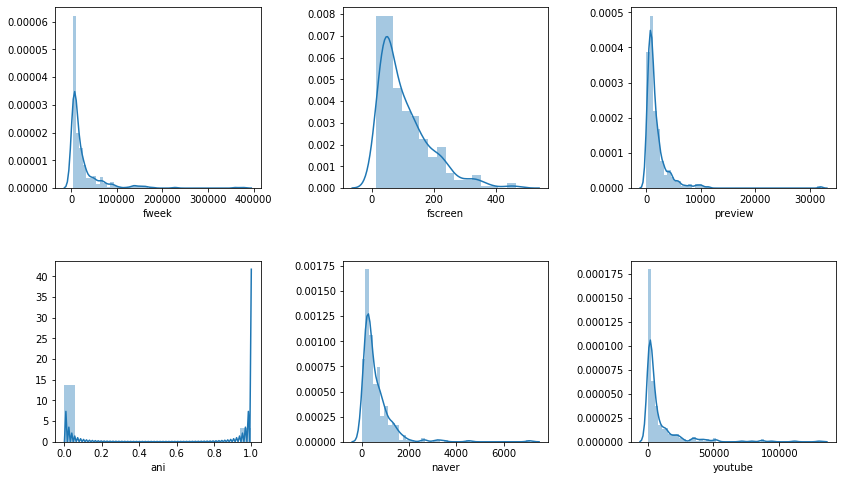

In [31]:
fig = plt.figure(figsize=(14,8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(0, 6):
    ax = fig.add_subplot(2, 3, i+1)
    sns.distplot(df[cols_with_Y[i]])

In [16]:
data = df[['title_en', 'fweek']].sort_values(by ='fweek', ascending=False)
data.head(100)

title_en   fweek
45                          Whiplash  377109
100                The Little Prince  360538
49                       Sing Street  227594
117                             Mune  178075
25                          Rock Dog  164314
..                               ...     ...
140                     I'm Off Then   22444
166                     Monster Hunt   21948
16                 Sunshine on Leith   21742
119                      The Lobster   21291
34   Paganini: The Devil’s Violinist   21225

[100 rows x 2 columns]

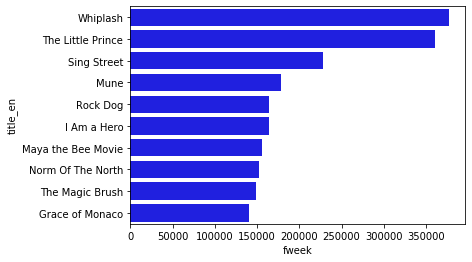

In [19]:
sns.barplot(x="fweek", y="title_en", data=data.head(10),
            label="first week", color="b")

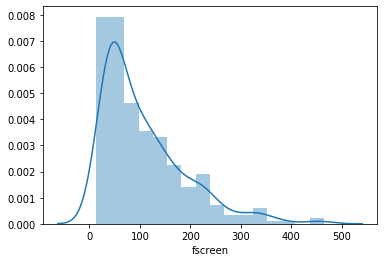

In [9]:
sns.distplot(df['fscreen'])

In [6]:
X = df[cols]
X = df[cols].assign(const=1)
Y = df["fweek"]
model = sm.OLS(Y, X).fit()

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fweek   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     155.2
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           3.76e-80
Time:                        21:44:55   Log-Likelihood:                -3429.1
No. Observations:                 299   AIC:                             6870.
Df Residuals:                     293   BIC:                             6892.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fscreen      250.1716     20.572     12.161      0.000     209.684     290.659
preview        4.8656      0.655      7.428      0.000       3.576       6.155
ani         1.482e+04   3497.896      4.237      0.000    7936.231    2.17e+04
naver          9.7015      2.414      4.019      0.000       4.950      14.453
youtube        0.5308      0.092      5.757      0.000       0.349       0.712
const      -2.184e+04   2333.384     -9.358      0.000   -2.64e+04   -1.72e+04
==============================================================================
Omnibus:                      139.859   Durbin-Watson:                   1.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1440.040
Skew:                           1.629   Prob(JB):                         0.00
Kurtosis:                      13.246   Cond. No.                     5.08e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.08e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model.params

fscreen      250.171582
preview        4.865602
ani        14820.417220
naver          9.701502
youtube        0.530833
const     -21836.251855
dtype: float64

In [9]:
cols_without_fscreen = ['preview', 'ani', 'naver', 'youtube']
X_without_fscreen = df[cols_without_fscreen]
X_without_fscreen = df[cols_without_fscreen].assign(const=1)
Y = df["fweek"]
model = sm.OLS(Y, X_without_fscreen).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  fweek   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     104.7
Date:                Wed, 18 Dec 2019   Prob (F-statistic):           2.50e-55
Time:                        21:44:55   Log-Likelihood:                -3490.2
No. Observations:                 299   AIC:                             6990.
Df Residuals:                     294   BIC:                             7009.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
preview        8.1921      0.729     11.240      0.000       6.758       9.627
ani         2.388e+04   4185.283      5.705      0.000    1.56e+04    3.21e+04
naver         19.9192      2.771      7.187      0.000      14.465      25.374
youtube        0.4241      0.112      3.773      0.000       0.203       0.645
const      -8300.3217   2511.385     -3.305      0.001   -1.32e+04   -3357.751
==============================================================================
Omnibus:                      173.911   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1721.945
Skew:                           2.200   Prob(JB):                         0.00
Kurtosis:                      13.902   Cond. No.                     5.05e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
cols_with_Y

['fweek', 'fscreen', 'preview', 'ani', 'naver', 'youtube']

In [12]:
train_dataset = df[cols_with_Y].sample(frac=0.7, random_state=100)
test_dataset = df[cols_with_Y].drop(train_dataset.index)
train_dataset.describe()

fweek     fscreen       preview         ani        naver  \
count     209.000000  209.000000    209.000000  209.000000   209.000000   
mean    28290.263158  109.157895   1907.708134    0.205742   600.071770   
std     42515.887222   83.009840   2797.677663    0.405213   676.304274   
min      3101.000000   13.000000     14.000000    0.000000    17.000000   
25%      5875.000000   43.000000    674.000000    0.000000   237.000000   
50%     11292.000000   83.000000   1119.000000    0.000000   387.000000   
75%     31091.000000  152.000000   2152.000000    0.000000   763.000000   
max    377109.000000  382.000000  32040.000000    1.000000  7104.000000   

             youtube  
count     209.000000  
mean     8335.665072  
std     16172.662100  
min        35.000000  
25%      1173.000000  
50%      3003.000000  
75%      7087.000000  
max    130407.000000

In [13]:
tt_y = train_dataset['fweek']
tt_x = train_dataset[cols]
tt_model = sm.OLS(tt_y, tt_x).fit()

In [14]:
tt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  fweek   R-squared (uncentered):                   0.781
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              145.7
Date:                Wed, 18 Dec 2019   Prob (F-statistic):                    2.59e-65
Time:                        21:44:55   Log-Likelihood:                         -2403.1
No. Observations:                 209   AIC:                                      4816.
Df Residuals:                     204   BIC:                                      4833.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
fscreen      165.3467     20.913      7.906      0.000     124.113     206.580
preview        5.0667      0.746      6.795      0.000       3.597       6.537
ani         7172.2461   4141.128      1.732      0.085    -992.655    1.53e+04
naver         -0.1671      2.949     -0.057      0.955      -5.981       5.647
youtube        0.6138      0.123      4.980      0.000       0.371       0.857
==============================================================================
Omnibus:                      122.277   Durbin-Watson:                   1.819
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              689.593
Skew:                           2.310   Prob(JB):                    1.81e-150
Kurtosis:                      10.605   Cond. No.                     4.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
train_data_y = tt_model.predict(train_dataset[cols])
test_data_y = tt_model.predict(test_dataset[cols])
test_data_y

0      134794.737747
2       33652.706155
4       15594.391220
5       25805.296033
8       43593.806621
           ...      
280      8865.335368
286     50586.069253
290      8650.584141
295      7426.196758
297     26418.283487
Length: 90, dtype: float64

In [37]:
Paired = plt.get_cmap('Paired')

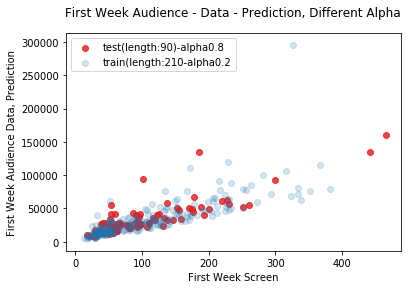

In [38]:
#tt ideal
plt.scatter(test_dataset['fscreen'], test_data_y, 
            alpha=0.8, color=Paired(5), label="test(length:90)-alpha0.8")
plt.scatter(train_dataset['fscreen'], train_data_y, 
            alpha=0.2, color=Paired(1), label="train(length:210-alpha0.2")
plt.xlabel('First Week Screen')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction, Different Alpha',y=1.05)
plt.legend()

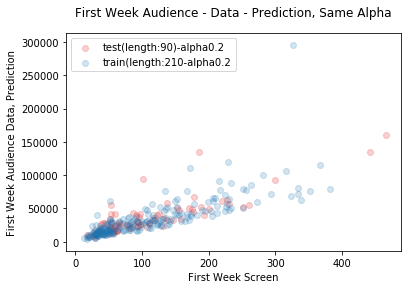

In [39]:
#tt ideal
plt.scatter(test_dataset['fscreen'], test_data_y, 
            alpha=0.2, color=Paired(5), label="test(length:90)-alpha0.2")
plt.scatter(train_dataset['fscreen'], train_data_y, 
            alpha=0.2, color=Paired(1), label="train(length:210-alpha0.2")
plt.xlabel('First Week Screen')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction, Same Alpha',y=1.05)
plt.legend()

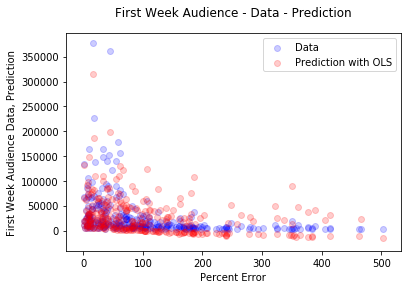

In [40]:
#ideal
plt.scatter(df['percent_error'], df["fweek"], 
            alpha=0.2, color='blue', label="Data")
plt.scatter(df['percent_error'], df["prediction"], 
            alpha=0.2, color='red', label="Prediction with OLS")
plt.xlabel('Percent Error')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction',y=1.05)
plt.legend()

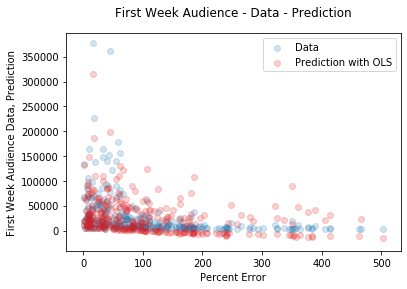

In [41]:
Paired = plt.get_cmap('Paired')
plt.scatter(df['percent_error'], df["fweek"], 
            alpha=0.2, color=Paired(1), label="Data")
plt.scatter(df['percent_error'], df["prediction"], 
            alpha=0.2, color=Paired(5), label="Prediction with OLS")
plt.xlabel('Percent Error')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction',y=1.05)
plt.legend()

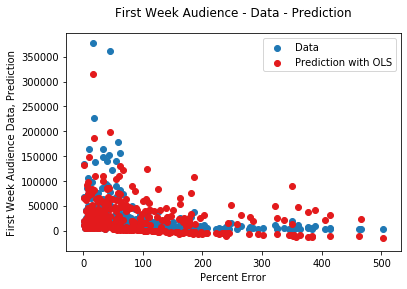

In [42]:
Paired = plt.get_cmap('Paired')
plt.scatter(df['percent_error'], df["fweek"], 
            alpha=1, color=Paired(1), label="Data")
plt.scatter(df['percent_error'], df["prediction"], 
            alpha=1, color=Paired(5), label="Prediction with OLS")
plt.xlabel('Percent Error')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction',y=1.05)
plt.legend()

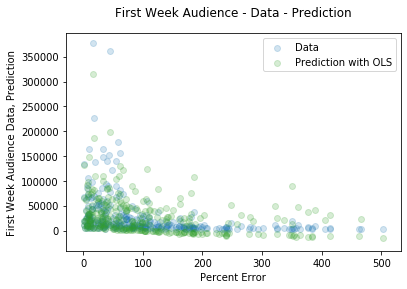

In [43]:
Paired = plt.get_cmap('Paired')
plt.scatter(df['percent_error'], df["fweek"], 
            alpha=0.2, color=Paired(1), label="Data")
plt.scatter(df['percent_error'], df["prediction"], 
            alpha=0.2, color=Paired(3), label="Prediction with OLS")
plt.xlabel('Percent Error')
plt.ylabel('First Week Audience Data, Prediction')
plt.title('First Week Audience - Data - Prediction',y=1.05)
plt.legend()

In [44]:
df['percent_error'].head()

0    1.525330
1    1.778919
2    1.916098
3    2.155216
4    2.197847
Name: percent_error, dtype: float64

In [45]:
df['percent_error'].tail()

294    413.629510
295    414.262544
296    463.157947
297    465.441964
298    502.188410
Name: percent_error, dtype: float64

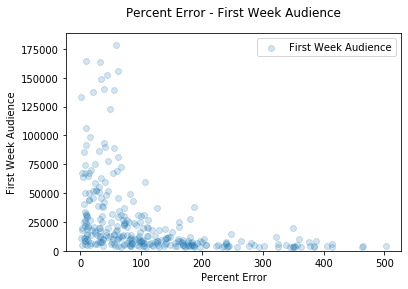

In [46]:
Paired = plt.get_cmap('Paired')
plt.scatter(df['percent_error'], df["fweek"], 
            alpha=0.2, color=Paired(1), label="First Week Audience")
plt.xlabel('Percent Error')
plt.ylabel('First Week Audience')
plt.title('Percent Error - First Week Audience',y=1.05)
plt.ylim(0, df["fweek"].max()/2)
plt.legend()

In [34]:
corr

fscreen   preview       ani     naver   youtube
fscreen  1.000000  0.499597  0.124636  0.453265  0.218357
preview  0.499597  1.000000 -0.069078  0.387631  0.385708
ani      0.124636 -0.069078  1.000000 -0.055916  0.031218
naver    0.453265  0.387631 -0.055916  1.000000  0.414833
youtube  0.218357  0.385708  0.031218  0.414833  1.000000

In [7]:
import matplotlib

In [8]:
matplotlib.__version__

'3.1.0'

In [ ]:
'''conda install matplotlib=3.1.0'''
'''https://github.com/mwaskom/seaborn/issues/1773'''

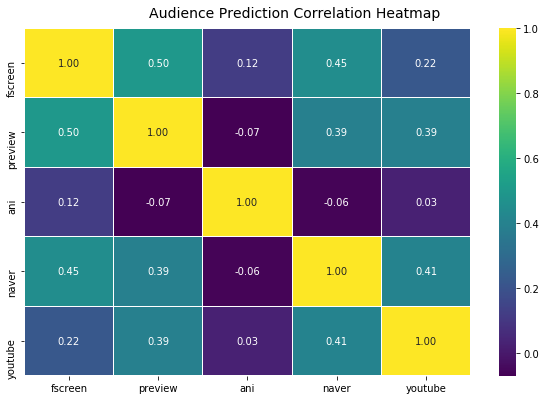

In [5]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
corr = df[cols].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="viridis",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Audience Prediction Correlation Heatmap', fontsize=14)

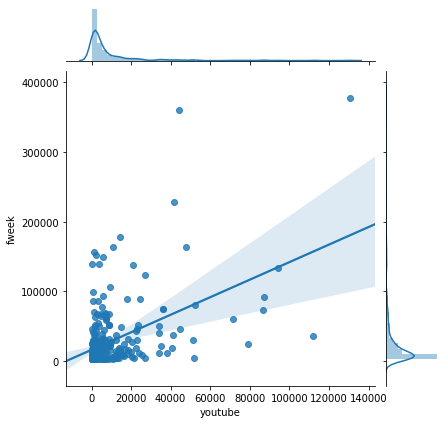

In [48]:
g = sns.jointplot(df['youtube'], df['fweek'], kind = 'reg')

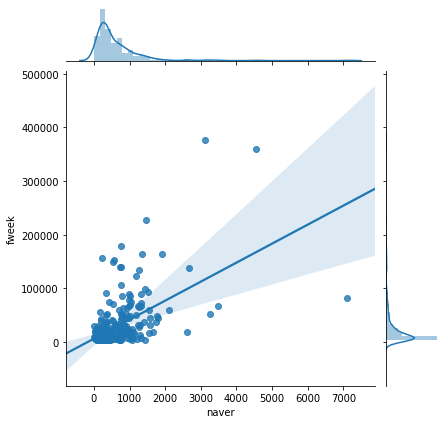

In [49]:
g = sns.jointplot(df['naver'], df['fweek'], kind = 'reg')

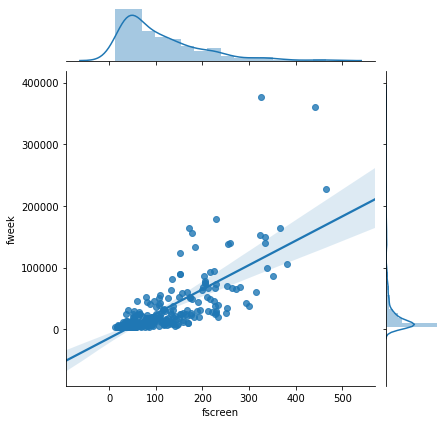

In [50]:
g = sns.jointplot(df['fscreen'], df['fweek'], kind = 'reg')

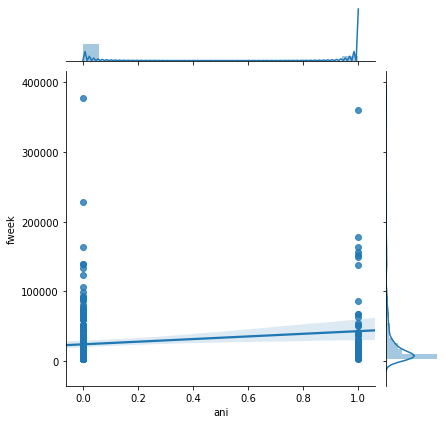

In [51]:
g = sns.jointplot(df['ani'], df['fweek'], kind = 'reg')

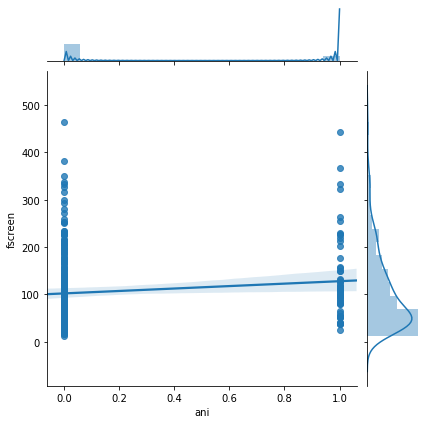

In [52]:
g = sns.jointplot(df['ani'], df['fscreen'], kind = 'reg')

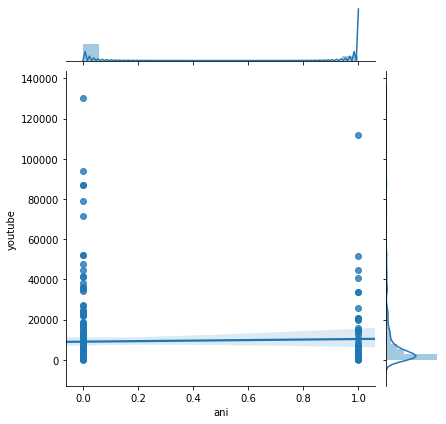

In [53]:
g = sns.jointplot(df['ani'], df['youtube'], kind = 'reg')

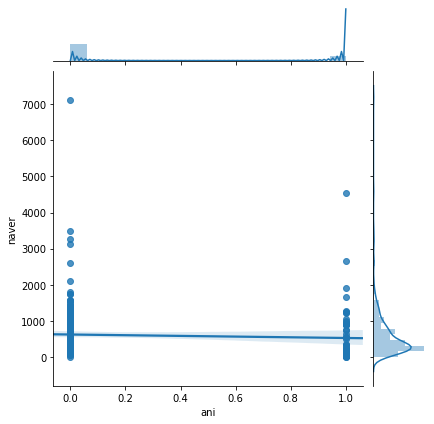

In [54]:
g = sns.jointplot(df['ani'], df['naver'], kind = 'reg')

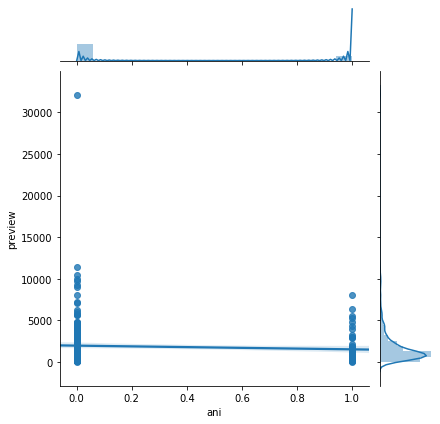

In [55]:
g = sns.jointplot(df['ani'], df['preview'], kind = 'reg')

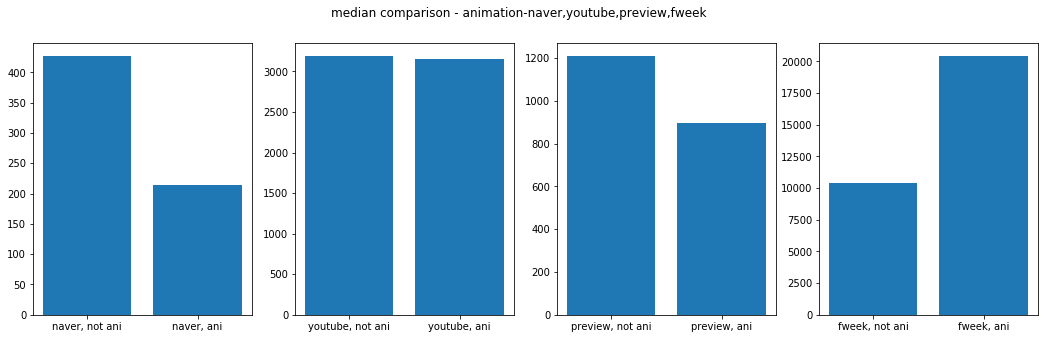

In [56]:
naver_animation_names = ['naver, not ani', 'naver, ani']
naver_animation_medians = [df[df['ani'] == 0]['naver'].median(), df[df['ani'] == 1]['naver'].median()]

youtube_animation_names = ['youtube, not ani', 'youtube, ani']
youtube_animation_medians = [df[df['ani'] == 0]['youtube'].median(), df[df['ani'] == 1]['youtube'].median()]

preview_animation_names = ['preview, not ani', 'preview, ani']
preview_animation_medians = [df[df['ani'] == 0]['preview'].median(), df[df['ani'] == 1]['preview'].median()]

fweek_animation_names = ['fweek, not ani', 'fweek, ani']
fweek_animation_medians = [df[df['ani'] == 0]['fweek'].median(), df[df['ani'] == 1]['fweek'].median()]

plt.figure(figsize=(18, 5))

plt.subplot(141)
plt.bar(naver_animation_names, naver_animation_medians)
plt.subplot(142)
plt.bar(youtube_animation_names, youtube_animation_medians)
plt.subplot(143)
plt.bar(preview_animation_names, preview_animation_medians)
plt.subplot(144)
plt.bar(fweek_animation_names, fweek_animation_medians)
plt.suptitle('median comparison - animation-naver,youtube,preview,fweek')
plt.show()

Text(0, 0.5, 'Frequency')

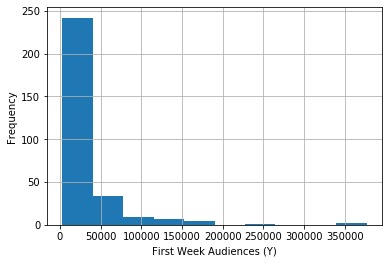

In [57]:
ax = df['fweek'].hist()
ax.set_xlabel("First Week Audiences (Y)")
ax.set_ylabel("Frequency")

In [58]:
start = min(df['fweek'])
end = max(df['fweek'])
bins = np.logspace(np.log10(start), np.log10(end), 20)

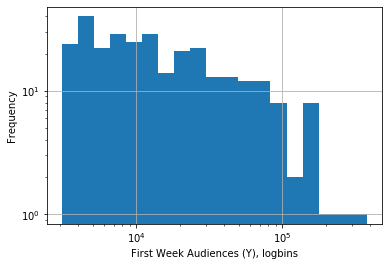

In [59]:
ax = df['fweek'].hist(log=True, bins=bins)
plt.gca().set_xscale("log")
ax.set_xlabel("First Week Audiences (Y), logbins")
ax.set_ylabel("Frequency")
plt.show()

Text(0.5, 1.05, 'Animation and Naver')

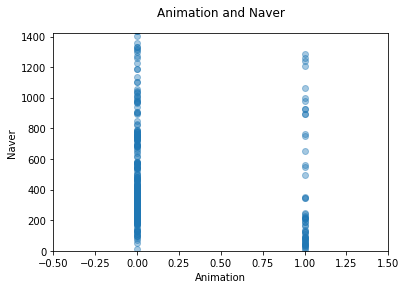

In [60]:
plt.scatter(df['ani'], df['naver'], 
            alpha=0.4)

plt.xlim(-0.5,1.5)
plt.ylim(0,max(df['naver'])/5)

plt.xlabel('Animation')
plt.ylabel('Naver')
plt.title('Animation and Naver',y=1.05)

Text(0.5, 1.05, 'Animation and First Week Screen')

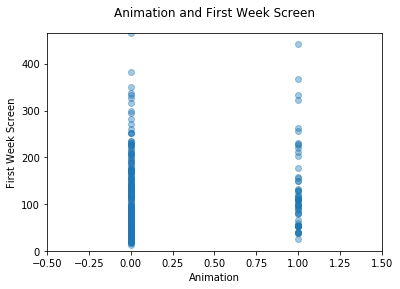

In [110]:
plt.scatter(df['ani'], df['fscreen'], 
            alpha=0.4)

plt.xlim(-0.5,1.5)
plt.ylim(0,max(df['fscreen']))

plt.xlabel('Animation')
plt.ylabel('First Week Screen')
plt.title('Animation and First Week Screen',y=1.05)

In [61]:
df[cols]

fscreen  preview  ani  naver  youtube
0        185     9215    0   1276    94057
1         47     3007    0    381     6111
2         52     4584    0    431     3097
3        212     1390    1    976     7075
4         38      415    1     40       70
..       ...      ...  ...    ...      ...
294       52      679    1   1210    20334
295       30      328    0    144     1349
296       19      775    0    153      239
297       68     1575    0   1436    12113
298       17      126    0    173      365

[299 rows x 5 columns]

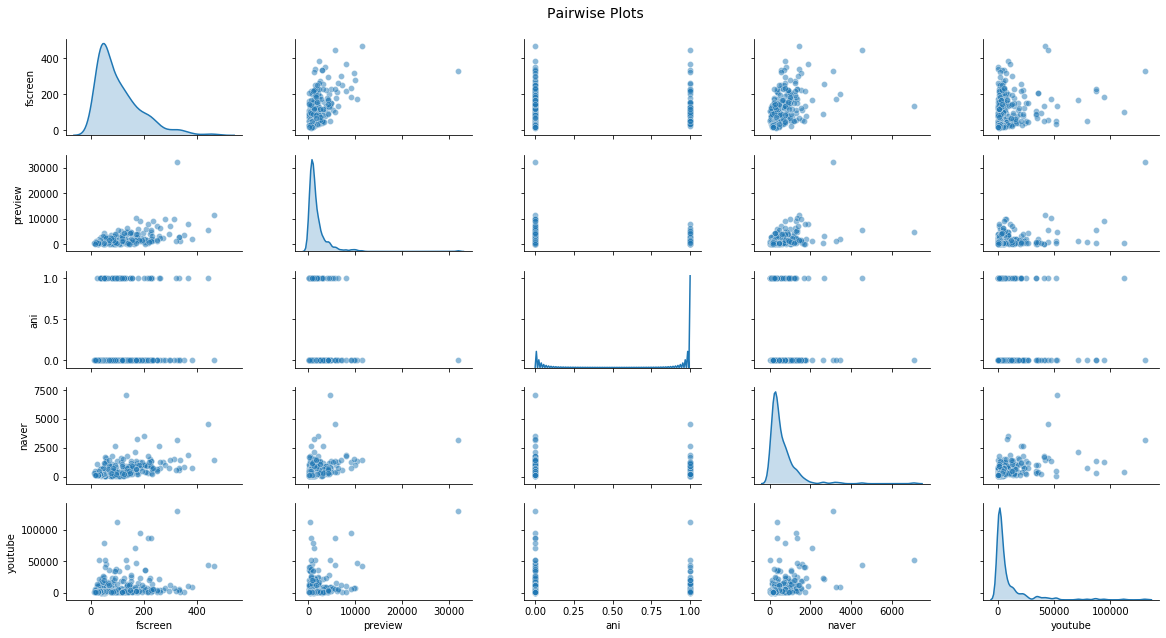

In [62]:
pp = sns.pairplot(df[cols], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="w", linewidth=0.5, alpha=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)

Text(0.5, 0, 'first week audiences')

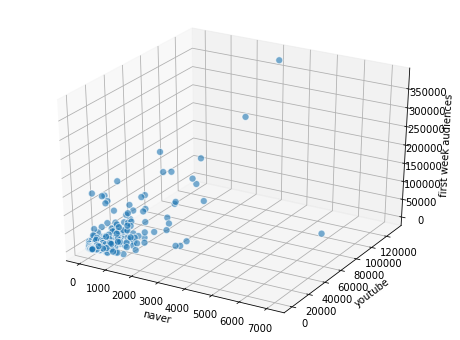

In [63]:
# Visualizing 3-D numeric data with Scatter Plots
# length, breadth and depth
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['naver']
ys = df['youtube']
zs = df['fweek']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('naver')
ax.set_ylabel('youtube')
ax.set_zlabel('first week audiences')

In [64]:
model = smf.ols(formula='fweek ~ naver + youtube', data=df)
results_formula = model.fit()
results_formula.params

Intercept    3965.258706
naver          27.217606
youtube         0.799724
dtype: float64

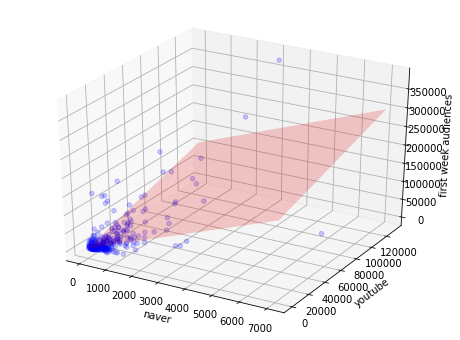

In [65]:
x_surf, y_surf = np.meshgrid(np.linspace(df.naver.min(), df.naver.max(), 100),np.linspace(df.youtube.min(), df.youtube.max(), 100))
onlyX = pd.DataFrame({'naver': x_surf.ravel(), 'youtube': y_surf.ravel()})
fittedY=results_formula.predict(exog=onlyX)

## convert the predicted result in an array
fittedY=np.array(fittedY)

# Visualize the Data for Multiple Linear Regression

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['naver'],df['youtube'],df['fweek'],c='blue', marker='o', alpha=0.2)
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='r', alpha=0.2)
ax.set_xlabel('naver')
ax.set_ylabel('youtube')
ax.set_zlabel('first week audiences')
plt.show()

Text(0.5, 0.9660000000000001, 'First Week Audience(Y): Size, Animation: Red, Not Animation: Blue)')

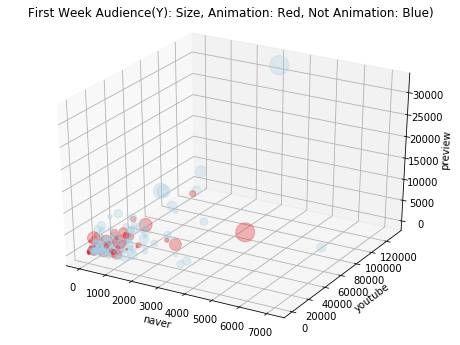

In [66]:
size = df['fweek']/1000
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['naver']
ys = df['youtube']
zs = df['preview']
colors = [Paired(5) if ani else Paired(0) for ani in df['ani']]
ax.scatter(xs, ys, zs, s=size, color=colors, alpha=0.3)

ax.set_xlabel('naver')
ax.set_ylabel('youtube')
ax.set_zlabel('preview')
plt.title('First Week Audience(Y): Size, Animation: Red, Not Animation: Blue)',y=1.05)

Text(0.5, 1.05, 'Animation: Red, Not Animation: Blue')

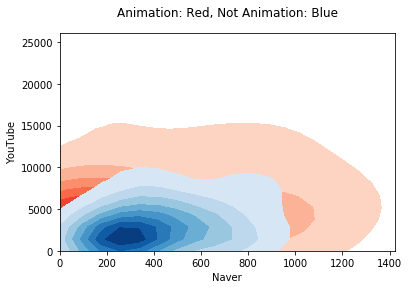

In [67]:
ani = df.loc[df['ani'] == 1]
not_ani = df.loc[df['ani'] == 0]
ax = sns.kdeplot(ani['naver'], ani['youtube'],
                  cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(not_ani['naver'], not_ani['youtube'],
                  cmap="Blues", shade=True, shade_lowest=False)
plt.xlim(0,max(df['naver'])/5)
plt.ylim(0,max(df['youtube'])/5)
plt.xlabel('Naver')
plt.ylabel('YouTube')
plt.title('Animation: Red, Not Animation: Blue',y=1.05)

Text(0.5, 1.05, 'First Week Audience: Size, Animation: Red, Not Animation: Blue)')

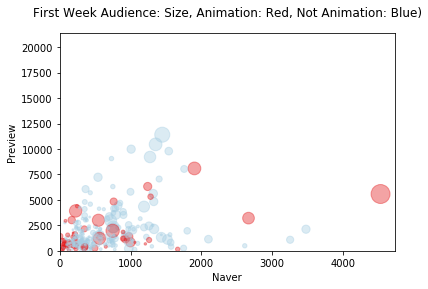

In [68]:
size = df['fweek']/1000
colors = [Paired(5) if ani else Paired(0) for ani in df['ani']]

plt.scatter(df['naver'], df['preview'], s=size, 
            alpha=0.4, color=colors)

plt.xlim(0,max(df['naver'])/1.5)
plt.ylim(0,max(df['preview'])/1.5)

plt.xlabel('Naver')
plt.ylabel('Preview')
plt.title('First Week Audience: Size, Animation: Red, Not Animation: Blue)',y=1.05)

Text(0.5, 1.05, 'First Week Audience: Size, Animation: Red, Not Animation: Blue)')

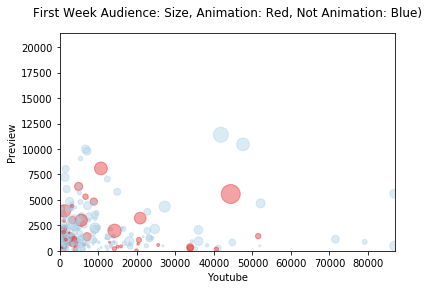

In [69]:
size = df['fweek']/1000
colors = [Paired(5) if ani else Paired(0) for ani in df['ani']]

plt.scatter(df['youtube'], df['preview'], s=size, 
            alpha=0.4, color=colors)

plt.xlim(0,max(df['youtube'])/1.5)
plt.ylim(0,max(df['preview'])/1.5)

plt.xlabel('Youtube')
plt.ylabel('Preview')
plt.title('First Week Audience: Size, Animation: Red, Not Animation: Blue)',y=1.05)

Text(0.5, 1.05, 'First Week Audience: Size, Animation: Red, Not Animation: Blue)')

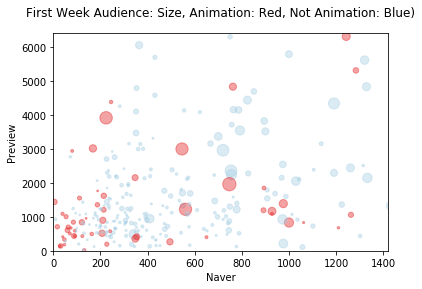

In [70]:
size = df['fweek']/1000
colors = [Paired(5) if ani else Paired(0) for ani in df['ani']]

plt.scatter(df['naver'], df['preview'], s=size, 
            alpha=0.4, color=colors)

plt.xlim(0,max(df['naver'])/5)
plt.ylim(0,max(df['preview'])/5)

plt.xlabel('Naver')
plt.ylabel('Preview')
plt.title('First Week Audience: Size, Animation: Red, Not Animation: Blue)',y=1.05)

<h2>Dimensionality Reduction</h2>
<p>Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables. It can be divided into feature selection and feature extraction.</p>

Text(0.5, 1.0, 'n_components=2, perplexity=50, learning_rate=800')

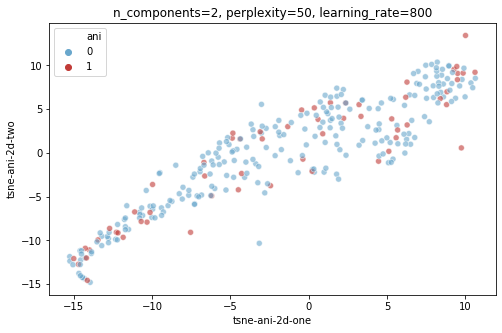

In [71]:
#tsne
n_components=2
perplexity=50
learning_rate=learning_rate=800
X_tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['ani'],
    palette=sns.color_palette(["#69A7CC", "#C13B37"]),
    data=df,
    legend="full",
    alpha=0.6
)
ax.set_title('n_components={}, perplexity={}, learning_rate={}'.format(n_components, perplexity, learning_rate))

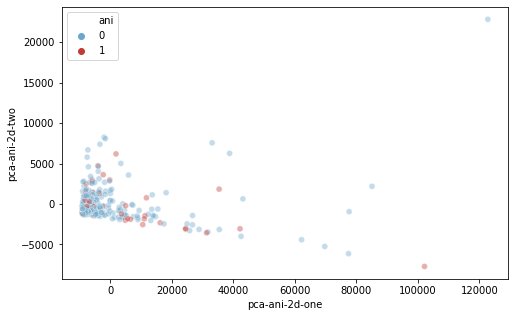

In [72]:
#pca

n_components=2
X_pca = PCA(n_components=n_components).fit_transform(df[cols])

df['pca-ani-2d-one'] = X_pca[:,0]
df['pca-ani-2d-two'] = X_pca[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-ani-2d-one", y="pca-ani-2d-two",
    hue=df['ani'],
    palette=sns.color_palette(["#69A7CC", "#C13B37"]),
    data=df,
    legend="full",
    alpha=0.4
)

<h3>Add another column 'success'</h3>
<p>'success' is 1 if 'first week audience' is higher than the median of 'first week audience' and else 0. Simply put, a successful movie's 'success' would be 1 and 0 if not. This time, we can try PCA/Tsne and see if movies can be classified according to the 'success'.</p>

In [73]:
#add another column success
df['success'] = np.where(df['fweek']>df['fweek'].median(), 1, 0)

In [74]:
df['success'].head()

0    1
1    0
2    1
3    1
4    0
Name: success, dtype: int64

In [75]:
cols.append('fweek')
cols

['fscreen', 'preview', 'ani', 'naver', 'youtube', 'fweek']

In [76]:
cols.remove('fweek')
cols

['fscreen', 'preview', 'ani', 'naver', 'youtube']

Text(0.5, 1.0, 'n_components=2, perplexity=50, learning_rate=1000')

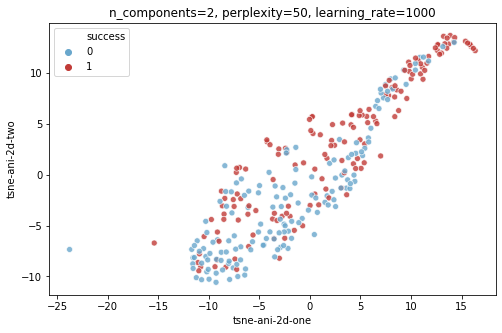

In [77]:
#tsne
n_components=2
perplexity=50
learning_rate=1000
X_tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax=sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['success'],
    palette=sns.color_palette(["#69A7CC", "#C13B37"]),
    data=df,
    legend="full",
    alpha=0.8
)
ax.set_title('n_components={}, perplexity={}, learning_rate={}'.format(n_components, perplexity, learning_rate))

In [78]:
df['fweekRanked'] = df['fweek'].rank(ascending=0)
df.loc[df['title_en'] == 'Begin Again']['fweekRanked']

0    13.0
Name: fweekRanked, dtype: float64

In [79]:
#add another column success
df['successby28'] = np.where(df['fweekRanked']>60, 1, 0)

Text(0.5, 1.0, 'n_components=2, perplexity=50, learning_rate=500')

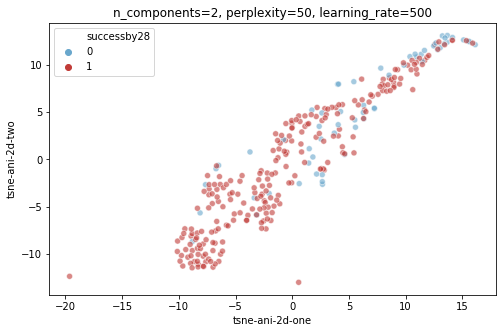

In [80]:
#tsne
n_components=2
perplexity=50
learning_rate=500
X_tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax=sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['successby28'],
    palette=sns.color_palette(["#69A7CC", "#C13B37"]),
    data=df,
    legend="full",
    alpha=0.6
)
ax.set_title('n_components={}, perplexity={}, learning_rate={}'.format(n_components, perplexity, learning_rate))

Text(0.5, 1.0, 'PCA with success')

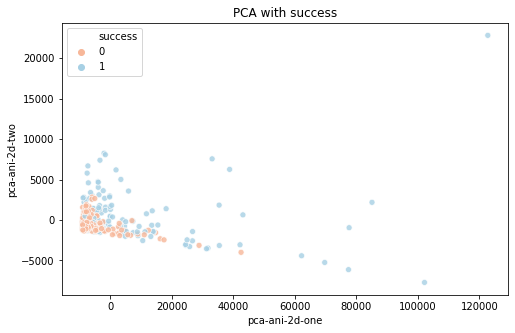

In [81]:
#pca
n_components=2
X_pca = PCA(n_components=n_components).fit_transform(df[cols])

df['pca-ani-2d-one'] = X_pca[:,0]
df['pca-ani-2d-two'] = X_pca[:,1]

plt.figure(figsize=(8,5))
ax=sns.scatterplot(
    x="pca-ani-2d-one", y="pca-ani-2d-two",
    hue=df['success'],
    palette=sns.color_palette("RdBu",2),
    data=df,
    legend="full",
    alpha=0.8
)
ax.set_title('PCA with success')

<h3>Add another column 'grade'</h3>
<p>'grade' is 1 if 'first week audience' is higher than the median of 'first week audience' and else 0. Simply put, successful movie's grade would be 1 and 0 if not. This time, we can try PCA/Tsne and see if movies can be classified according to the 'grade'.</p>

In [82]:
df['fweekRanked'] = df['fweek'].rank(ascending=0)
df.loc[df['title_en'] == 'Begin Again']['fweekRanked']

0    13.0
Name: fweekRanked, dtype: float64

In [83]:
df['grade'] = (df['fweekRanked'])//30+1

In [84]:
df[['title_en', 'grade']]

title_en  grade
0                                   Begin Again    1.0
1                                   Son of Saul    6.0
2                         Night Train to Lisbon    4.0
3                                      Foosball    2.0
4                                  Brave Rabbit    9.0
..                                          ...    ...
294                   Yowamushi Pedal the Movie    8.0
295                                  Twice Born   10.0
296                              Our Last Tango   10.0
297  Journey to the West: Conquering the Demons   10.0
298                                 Vijay and I   10.0

[299 rows x 2 columns]

Text(0.5, 1.0, 'n_components=2, perplexity=20, learning_rate=400')

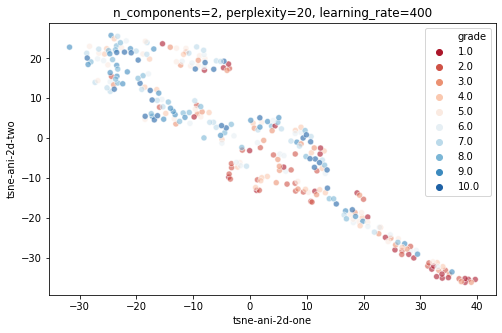

In [85]:
#tsne
n_components=2
perplexity=20
learning_rate=400
X_tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("RdBu",10),
    data=df,
    legend="full",
    alpha=0.6,
)
ax.set_title('n_components={}, perplexity={}, learning_rate={}'.format(n_components, perplexity, learning_rate))

Text(0.5, 1.0, 'n=2, perplexity=20, learning_rate=1000')

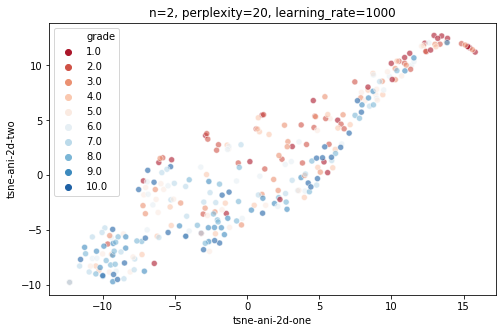

In [86]:
#tsne
n_components=2
perplexity=50
learning_rate=1000
X_tsne = TSNE(n_components=n_components, perplexity=perplexity).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("RdBu",10),
    data=df,
    legend="full",
    alpha=0.6
)
ax.set_title('n=2, perplexity=20, learning_rate=1000')

Text(0.5, 1.0, 'n=2, perplexity=20, learning_rate=1000')

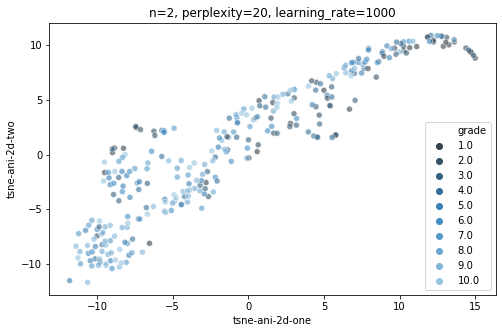

In [87]:
#tsne
n_components=2
perplexity=50
learning_rate=1000
X_tsne = TSNE(n_components=n_components, perplexity=perplexity).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("Blues_d",10),
    data=df,
    legend="full",
    alpha=0.6
)
ax.set_title('n=2, perplexity=20, learning_rate=1000')

Text(0.5, 1.0, 'n=2, perplexity=20, learning_rate=1000')

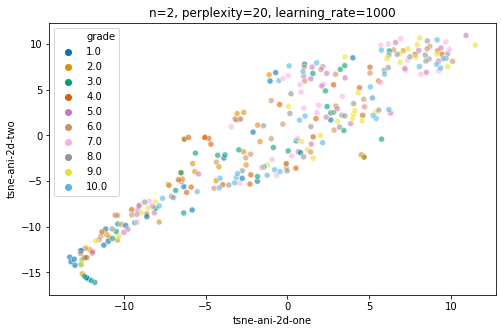

In [88]:
#tsne
n_components=2
perplexity=50
learning_rate=1000
X_tsne = TSNE(n_components=n_components, perplexity=perplexity).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("colorblind",10),
    data=df,
    legend="full",
    alpha=0.6
)
ax.set_title('n=2, perplexity=20, learning_rate=1000')

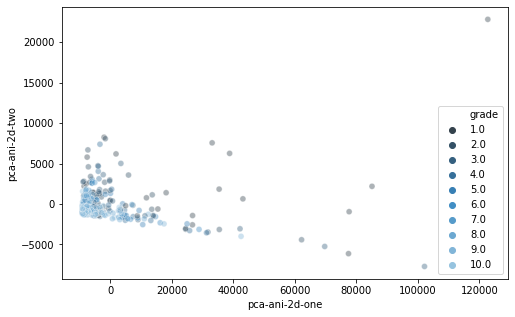

In [89]:
#pca
n_components=2
X_pca = PCA(n_components=n_components).fit_transform(df[cols])

df['pca-ani-2d-one'] = X_pca[:,0]
df['pca-ani-2d-two'] = X_pca[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-ani-2d-one", y="pca-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("Blues_d",10),
    data=df,
    legend="full",
    alpha=0.4
)

In [104]:
pca = PCA(n_components=2)

In [105]:
pc = pca.fit_transform(df[cols])

In [106]:
pca.explained_variance_ratio_

array([0.97949113, 0.01926872])

In [ ]:
#pca
n_components=2
X_pca = PCA(n_components=n_components).fit_transform(df[cols])

df['pca-ani-2d-one'] = X_pca[:,0]
df['pca-ani-2d-two'] = X_pca[:,1]

plt.figure(figsize=(8,5))
sns.scatterplot(
    x="pca-ani-2d-one", y="pca-ani-2d-two",
    hue=df['grade'],
    palette=sns.color_palette("RdBu",10),
    data=df,
    legend="full",
    alpha=0.6
)

In [ ]:
df['gradeby5'] = (df['fweekRanked'])//60+1

In [ ]:
#tsne
n_components=2
perplexity=20
learning_rate=400
X_tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate).fit_transform(df[cols])

df['tsne-ani-2d-one'] = X_tsne[:,0]
df['tsne-ani-2d-two'] = X_tsne[:,1]

plt.figure(figsize=(8,5))
ax = sns.scatterplot(
    x="tsne-ani-2d-one", y="tsne-ani-2d-two",
    hue=df['gradeby5'],
    palette=sns.color_palette("Blues_d",5),
    data=df,
    legend="full",
    alpha=0.6,
)
ax.set_title('n=2, perplexity=20, learning_rate=400')

In [ ]:
'''future
And movie audience depend on many features like political conditions and economic
stability of a country (2017)'''